# Case_study_2_1

Linear regression vs. Ridge regression vs. LASSO

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/OTBD/main/content/init.py
import init; init.init(force_download=False)

In [1]:
from local.lib.Generation import scenarios_regression
from local.lib.utils import solver_cvx, plot_surface, test_phase_reg
import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#!pip install cvxpy

In [ ]:
import cvxpy as cp

[[2.         1.96156408 1.96156408 1.62879552 1.97190487]
 [1.         1.07568346 1.07568346 0.94298953 0.56517649]]


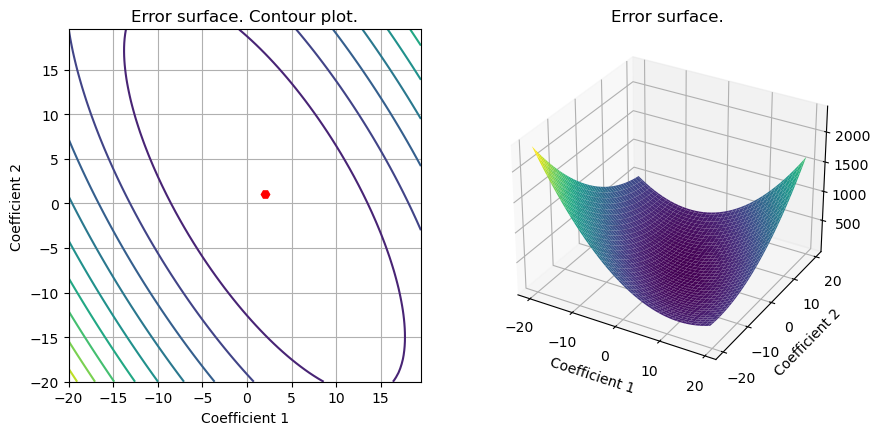

In [2]:
# Loading scenarios
# ===========================
scenario=1;
data_reg,set_up=scenarios_regression(scenario);

# Definition of the problem
# ===================================

loss_fn = lambda n, X, Y, w: (1/n)*cp.pnorm(X @ w - Y, p=2)**2
reg_L2 = lambda w: cp.pnorm(w, p=2)**2
reg_L1 = lambda w: cp.pnorm(w, p=1)

loss_LS = lambda n, X, Y, w, lambd: loss_fn(n, X, Y, w)
loss_LS_L2 = lambda n, X, Y, w, lambd: loss_fn(n, X, Y, w) + (lambd/2) * reg_L2(w)
loss_LS_L1 = lambda n, X, Y, w, lambd: loss_fn(n, X, Y, w) + lambd * reg_L1(w)


# Different ways to solve theoreticaly the LS
#=========================================
# Solution of the empirical risk using CVX
x_cvx=solver_cvx(set_up,loss_LS);
x_L1_cvx=solver_cvx(set_up, loss_LS_L1);
x_L2_cvx=solver_cvx(set_up, loss_LS_L2);

Xtrain = set_up['Xtrain'][:,:set_up['d']+1]
x_opt=np.linalg.inv(Xtrain.T@Xtrain)@Xtrain.T@set_up['ytrain'][:,0];
print(np.c_[data_reg['Reg_opt'],x_cvx,x_opt,x_L2_cvx,x_L1_cvx])


# We draw the surface (just when d=1)
S1=plot_surface(set_up,loss_LS,data_reg['Reg_opt']);

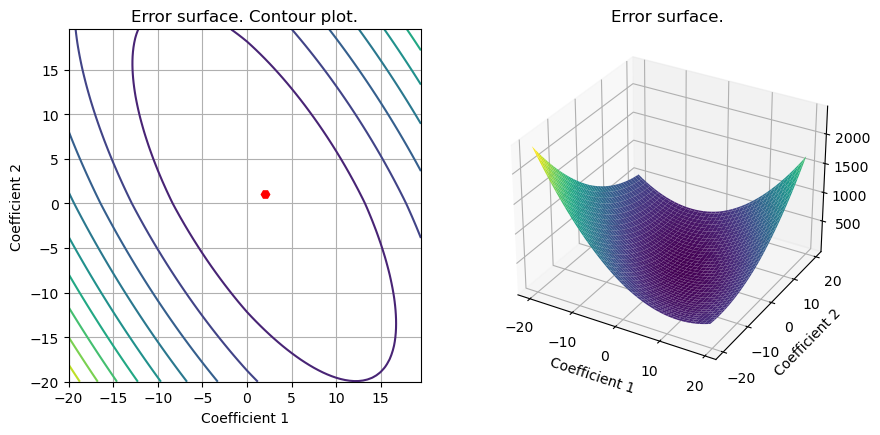

In [3]:
S2=plot_surface(set_up,loss_LS_L1,data_reg['Reg_opt']);

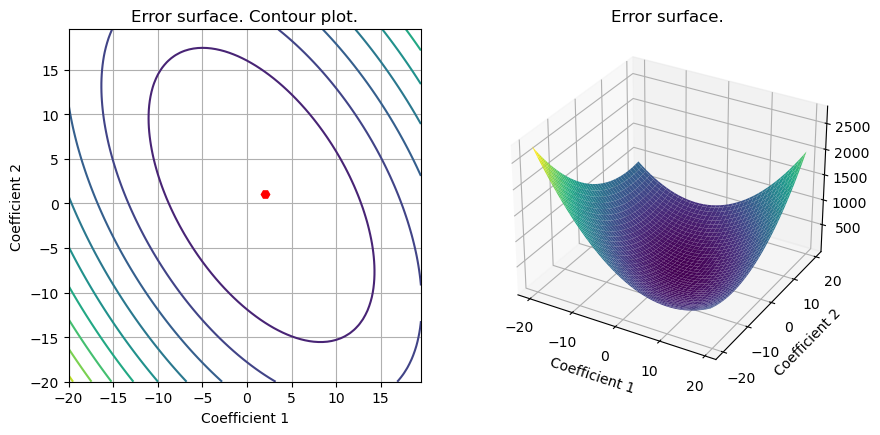

In [4]:
S3=plot_surface(set_up,loss_LS_L2,data_reg['Reg_opt']);

0.017868931185189063
0.01971698001633375
0.020547506771126763
0.017868931185189063 0.01971698001633375 0.020547506771126763


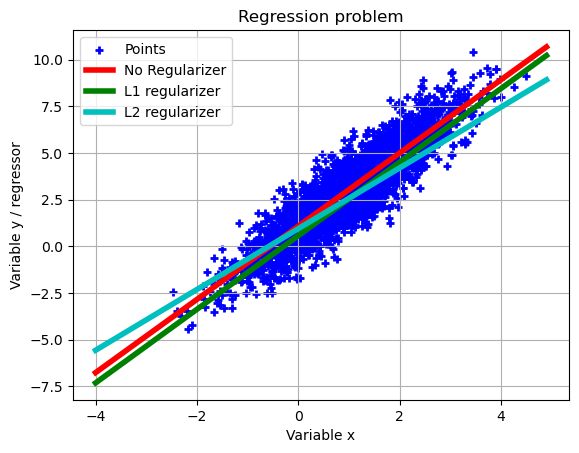

In [6]:
# We test the regression solution
plt.scatter(set_up['Xtest'][:,0],set_up['ytest'][:,0],marker='+',color='b',linewidth = 2, label= 'Points')
plt.grid()
plt.xlabel('Variable x')
plt.ylabel('Variable y / regressor')
plt.title('Regression problem')
error_1=test_phase_reg(set_up,x_cvx,'r','No Regularizer');
error_2=test_phase_reg(set_up,x_L1_cvx,'g','L1 regularizer');
error_3=test_phase_reg(set_up,x_L2_cvx,'c','L2 regularizer');
plt.legend()
print(error_1,error_2,error_3)